In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib notebook
import matplotlib as mpl
import numpy as np
mpl.get_backend()
import xgboost as xg

In [4]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')
df1
df2=pd.read_csv('gender_submission.csv')
df2
df['train_test'] = 1
df1['train_test'] = 0
df1['Survived'] = np.NaN
all_data=pd.concat([df,df1])
all_data 
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,NaN


### getting info about non null values and data types


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


### Getting central tendencies of data

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


### Seperate the data into numerical and categoricals

In [7]:
df_num=df[['Age','SibSp','Parch','Fare']]
df_ctg=df[['Survived','Pclass','Embarked','Sex','Ticket','Cabin']]
df_num
df_ctg


,Survived,Pclass,Embarked,Sex,Ticket,Cabin
0,0,3,S,male,A/5 21171,NaN
1,1,1,C,female,PC 17599,C85
2,1,3,S,female,STON/O2. 3101282,NaN
3,1,1,S,female,113803,C123
4,0,3,S,male,373450,NaN
...,...,...,...,...,...,...
886,0,2,S,male,211536,NaN
887,1,1,S,female,112053,B42
888,0,3,S,female,W./C. 6607,NaN
889,1,1,C,male,111369,C148


### Plot histogram for numeric variables to understand their distribution.

<IPython.core.display.Javascript object>


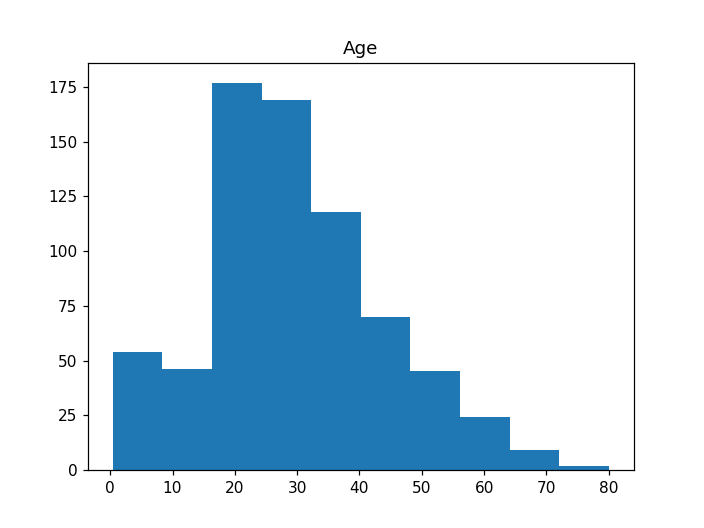

C:\Users\Pradyumna Bada\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Pradyumna Bada\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<IPython.core.display.Javascript object>


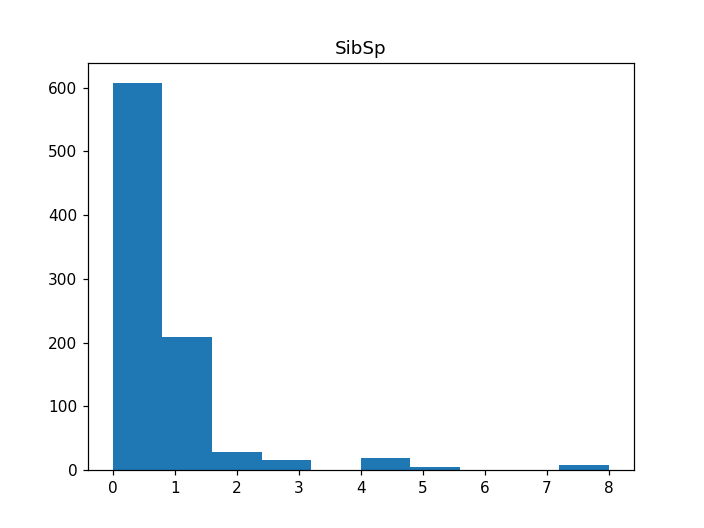

<IPython.core.display.Javascript object>


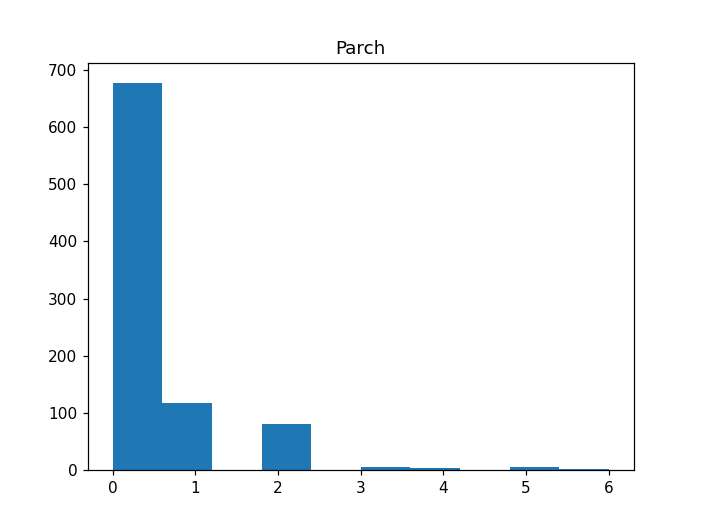

<IPython.core.display.Javascript object>


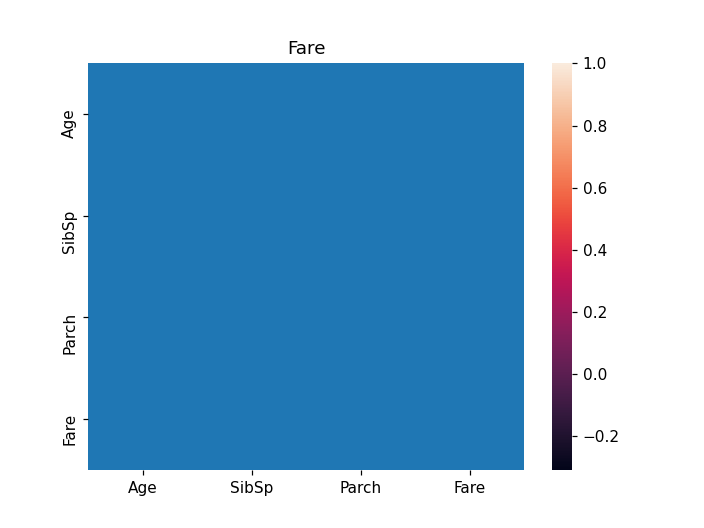

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
import matplotlib.pyplot as plt
for i in df_num.columns:
    fig,ax=plt.subplots()
    ax.hist(df_num[i])
    ax.set_title(i)
df_num['SibSp'].value_counts()

### See the correlation between the numeric variables

In [9]:
print(df_num.corr())
sns.heatmap(df_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


 ### Draw pivot table to compare features with output variables 
 ### i.e to undersatnd survival rate across numerical variables

In [10]:
pd.pivot_table(df,index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Draw Value counts for categorical values

<IPython.core.display.Javascript object>


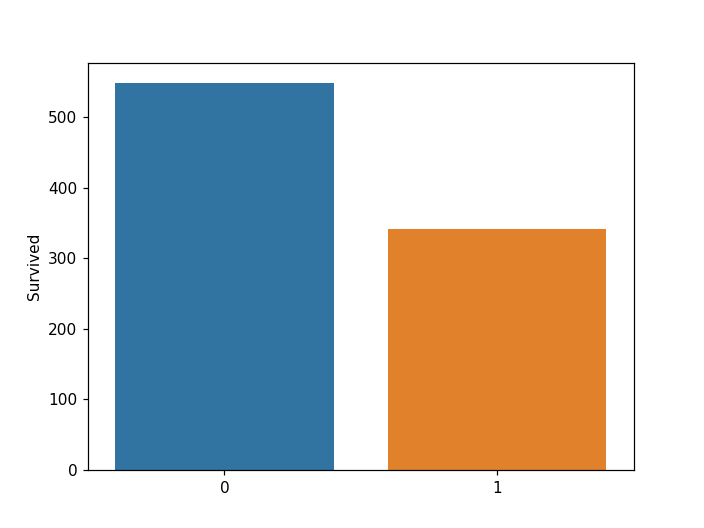

<IPython.core.display.Javascript object>


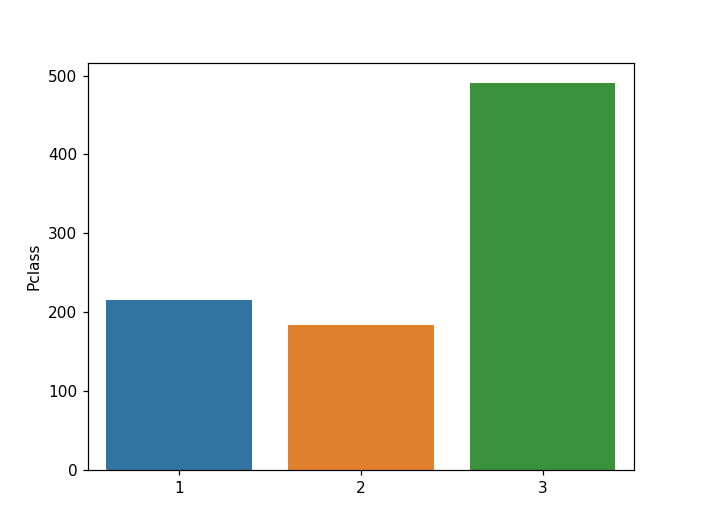

<IPython.core.display.Javascript object>


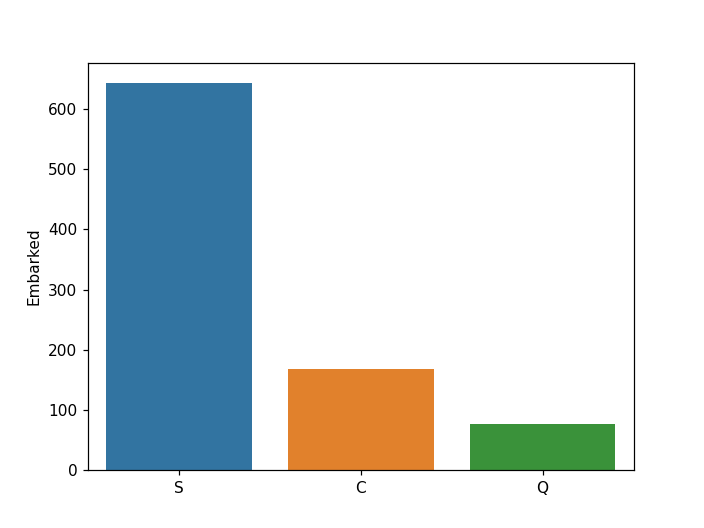

<IPython.core.display.Javascript object>


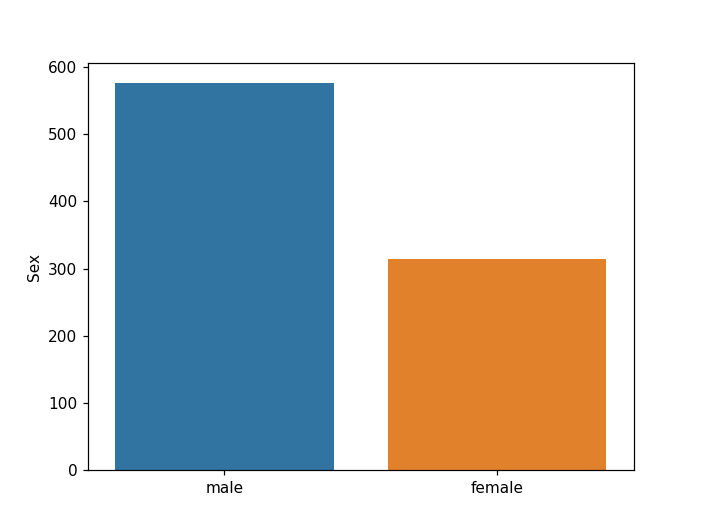

<IPython.core.display.Javascript object>


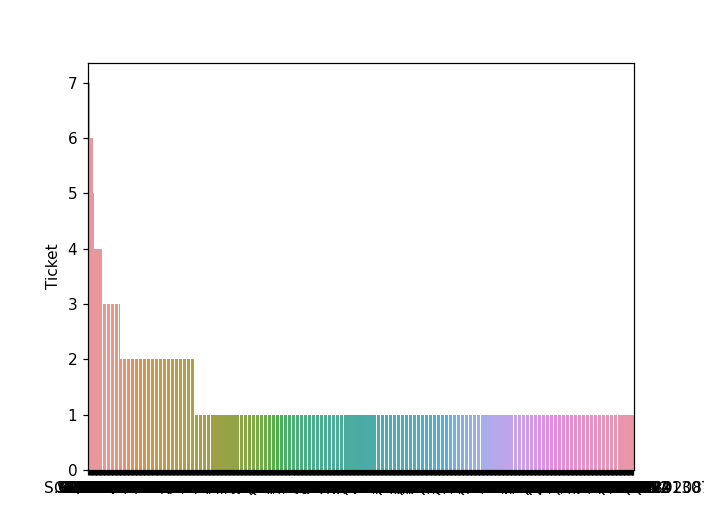

<IPython.core.display.Javascript object>


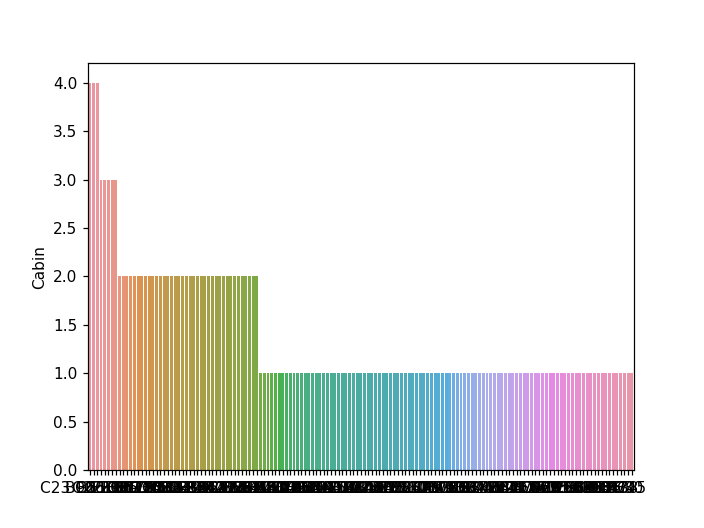

In [11]:
for i in df_ctg.columns:
    fig,ax=plt.subplots()
    sns.barplot(df_ctg[i].value_counts().index,df_ctg[i].value_counts())

### Draw pivot table to compare categorical variable w.r.t survival

In [12]:
print(pd.pivot_table(df,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))

print(pd.pivot_table(df,index='Survived',columns=['Sex'],values='Ticket',aggfunc='count'))

print(pd.pivot_table(df,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Feature Engineering
#### 1) Cabin - We need to  check the number of cabin a passenger has booked. most of them doesnt have one



In [13]:
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_multiple'].value_counts()
print(pd.pivot_table(df,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count'))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


#### Does cabin letter affect survival

In [52]:
df['cabin_adv']= df['Cabin'].apply(lambda x : str(x)[0] if not pd.isna(x) else 'n')
df['cabin_adv'].value_counts()
print(pd.pivot_table(df,index='Survived',columns='cabin_adv',values='Ticket',aggfunc='count'))

cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


#### 2) Tickets - Does ticket affect survival?

In [15]:
 
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] =df.Ticket.apply(lambda x: (x.split(' ')[0]).replace('/','').replace('.','').lower() if len(x.split(' ')[:-1]) >0 else 0)
df['ticket_letters'].value_counts()
print(pd.pivot_table(df,index='Survived',columns='ticket_letters',values='Ticket',aggfunc='count'))

ticket_letters      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                  ...   
0               410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1               255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

ticket_letters  sop  sopp  sotono2  sotonoq   sp  stono  stono2  swpp   wc  \
Survived                                                                     
0               1.0   3.0      2.0     13.0  1.0    7.0     3.0   NaN  9.0   
1               NaN   NaN      NaN      2.0  NaN    5.0     3.0   2.0  1.0   

ticket_letters  wep  
Survived             
0               2.0  
1               1.0  

[2 rows x 29 columns]


#### 3) Does a person's title relate to survival rates?


In [16]:
df['name_title']=df['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()
print(pd.pivot_table(df,index="Survived",columns='name_title',values='PassengerId',aggfunc='count')) #value = ticket is also right
all_data

name_title  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                      
0            1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1            NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

name_title  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                   
0           NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1           1.0   81.0  99.0  1.0  NaN  1.0           1.0  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


## Data preprocessing
#### drop null values
### First apply all the above feature engineering and data preprocssing to both train and test data(i.e all_data)

In [17]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: x.split(' ')[0].replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,n,0,a5,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,1,C,0,pc,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,n,0,sotonoq,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0,n,1,0,Mr


### Impute null values in age and fare

In [55]:
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(df.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(df.Fare.median())
all_data.dropna(subset=['Embarked'],inplace = True)
all_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title,norm_sibsp,norm_parch,norm_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,0,n,0,a5,Mr,0.693147,0.000000,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,1,C,0,pc,Mrs,0.693147,0.000000,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,0,n,0,stono2,Miss,0.000000,0.000000,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,1,C,1,0,Mrs,0.693147,0.000000,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,0,n,1,0,Mr,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,...,S,0,0,n,0,a5,Mr,0.000000,0.000000,2.202765
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,0,1,C,0,pc,Dona,0.000000,0.000000,4.699571
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,0,0,n,0,sotonoq,Mr,0.000000,0.000000,2.110213
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,...,S,0,0,n,1,0,Mr,0.000000,0.000000,2.202765


### Normalising the data which has high variance
#### Anyhow after normalising only fare shown some improvement. so will be using only that
##### 


<IPython.core.display.Javascript object>


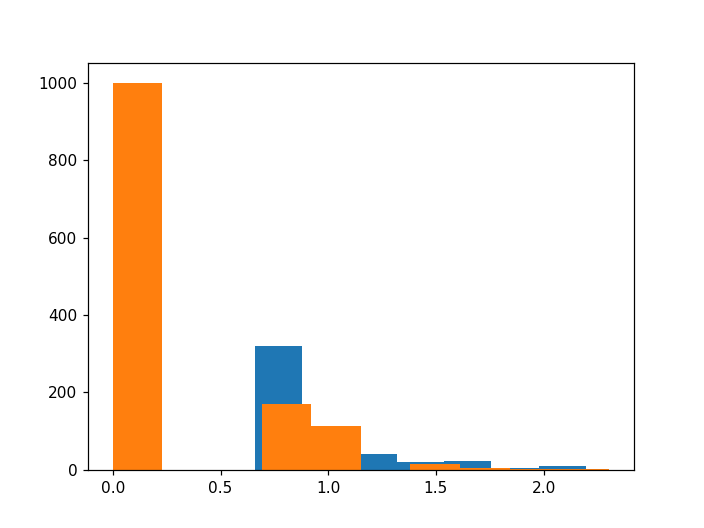

<IPython.core.display.Javascript object>


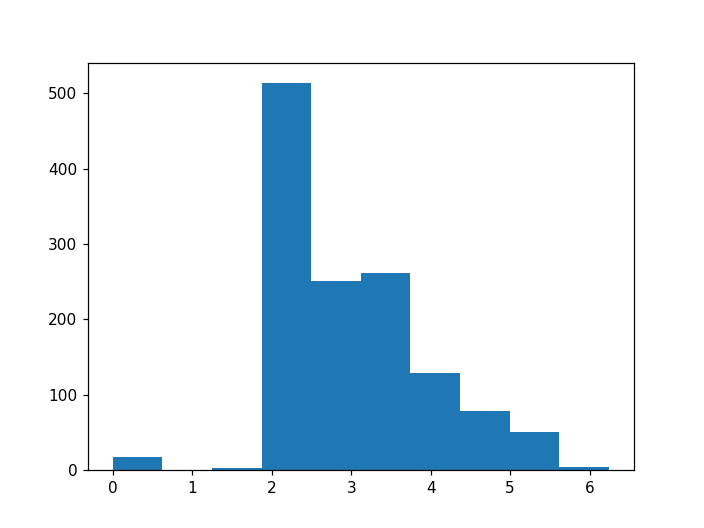

<IPython.core.display.Javascript object>


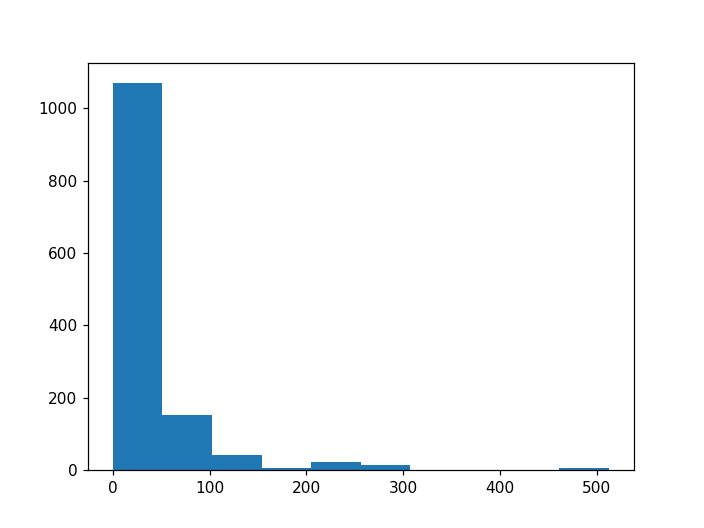

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1307 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1307 non-null   object 
 12  train_test      1307 non-null   int64  
 13  cabin_multiple  1307 non-null   int64  
 14  cabin_adv       1307 non-null   object 
 15  numeric_ticket  1307 non-null   int64  
 16  ticket_letters  1307 non-null   object 
 17  name_title      1307 non-null   ob

In [19]:
import numpy as np
fig,ax=plt.subplots()
fig,ax1=plt.subplots()
fig,ax2=plt.subplots()
#not used
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
ax.hist(all_data['norm_sibsp'])
#not used
all_data['norm_parch']=np.log(all_data['Parch']+1)
ax.hist(all_data['norm_parch'])
all_data['norm_fare'] = np.log(all_data.Fare+1)
ax2.hist(all_data['Fare'])
ax1.hist(all_data['norm_fare'])
all_data.info()

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
onehot=OneHotEncoder()
data=pd.DataFrame(onehot.fit_transform(all_data[['Sex','SibSp','Embarked','cabin_adv','name_title']]).toarray())
data
#didnt use this because of too much complexity

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1303,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1305,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### we need to convert categorical values to numericals before feeding into the model. Im using pandas get dummy method. some of the other methods are labelencoder and onehot encoder 


In [23]:
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])
all_dummies

,Pclass,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Sex_female,Sex_male,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,3,22.0,1,0,2.110213,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,4.280593,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,2.188856,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,3.990834,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,2.202765,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,2.202765,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,1,39.0,0,0,4.699571,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
415,3,38.5,0,0,2.110213,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,3,28.0,0,0,2.202765,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### since we had joined the train and test data using train_test column for preprocessing, now its time to seperate them before building model

In [24]:
X_train=all_dummies[all_dummies['train_test']==1].drop(['train_test'],axis=1)
X_test=all_dummies[all_dummies['train_test']==0].drop(['train_test'],axis=1)
y_train=all_data[all_data['train_test']==1]['Survived']
y_train
X_train


,Pclass,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Sex_female,Sex_male,Embarked_C,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,3,22.0,1,0,2.110213,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,4.280593,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,2.188856,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,3.990834,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,2.202765,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,2.639057,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
887,1,19.0,0,0,3.433987,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
888,3,28.0,1,2,3.196630,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
889,1,26.0,0,0,3.433987,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


## Since we will be using many linear and polynomial models, its very important to scale the data. 

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)


### model building

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV 

### Instead of fitting each model seperately, I will use a for loop to iterate through tuple of (model_type,model) and then fit the training data 

In [29]:
Classifiers = {'GaussianNB': GaussianNB(), 
               'Logistic Regression': LogisticRegression(),
              'DT Classifier': DecisionTreeClassifier(),
              'KNeighborsClassfier': KNeighborsClassifier(),
              'RFClassifier': RandomForestClassifier(),
              'SVC':SVC(probability=True),
              'XGBClassifier':XGBClassifier()}
results=pd.DataFrame(columns=['Score'])
for model_type,model in Classifiers.items():
    cv=cross_val_score(model,X_train_scaled,y_train,cv=5)
    results.loc[model_type]=cv.mean()
results

,Score
GaussianNB,0.719926
Logistic Regression,0.820060
DT Classifier,0.790827
KNeighborsClassfier,0.815565
RFClassifier,0.805415
SVC,0.829055
XGBClassifier,0.818898


In [31]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
print(best_clf_lr.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   36.6s


0.8223132101821875


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.7s finished


In [101]:
print(best_clf_lr.best_score_)
print(best_clf_lr.best_params_)

0.8223132101821875
{'C': 29.763514416313132, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [102]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   30.3s finished


In [109]:
print(best_clf_knn.best_score_,'\n',best_clf_knn.best_params_)

0.826769504221418 
 {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [32]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  4.4min finished


In [34]:
print(best_clf_svc.best_score_,'\n',best_clf_svc.best_params_)

0.8290547832158953 
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [115]:

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
print(best_clf_rf_rnd.best_score_,best_clf_rf_rnd.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


0.8313146702215451 {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


In [117]:
grid_params={'n_estimators':[400,500,600],
            'max_depth':[15,20,25,30],
             'min_samples_split': [1,2,3], 
             'min_samples_leaf': [4,5,6],
             'max_features': ['auto'],
             'bootstrap': [False] }
grid_rf_model=GridSearchCV(rf,param_grid=grid_params,cv=5,verbose=True,n_jobs=-1)            
best_rf_model=grid_rf_model.fit(X_train_scaled,y_train)
print(best_rf_model.best_score_,best_rf_model.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.0min finished


0.8313146702215451 {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}


In [130]:
random_forest=RandomForestClassifier(bootstrap= False, max_depth= 15, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 2, n_estimators= 400).fit(X_train_scaled,y_train)
#random_forest.score(X_train_scaled,y_train)
cross_val_score(random_forest,X_train_scaled,y_train,cv=5).mean()

0.8301783787215135

In [34]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']}

clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
print(best_clf_xgb_rnd.best_score_,best_clf_xgb_rnd.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2639 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3783 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4870 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 4993 out of 5000 | elapsed:  7.7min remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  7.7min finished


0.8504030978226369 {'subsample': 0.8, 'sampling_method': 'uniform', 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': None, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.2}


In [50]:
final_y=best_clf_xgb_rnd.best_estimator_.predict(X_test_scaled)
submission=pd.DataFrame({'PassengerId': df1['PassengerId'],'Survived':final_y})
submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
